In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import itertools as it

import jieba
import re
import numpy as np
from PIL import Image
from func import *

In [3]:
from pdfminer.pdfparser import PDFParser, PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LAParams, LTTextBox, LTTextLine
from io import StringIO

In [4]:
def readPDF(file_name):
    parser = PDFParser(open(file_name, 'rb'))
    doc = PDFDocument()
    parser.set_document(doc)
    doc.set_parser(parser)
    doc.initialize('')
    rsrcmgr = PDFResourceManager()
    device = PDFPageAggregator(rsrcmgr, laparams = LAParams(all_texts = True))
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    content = []

    for page in doc.get_pages():
        interpreter.process_page(page)
        layout = device.get_result()
        text = ''
        for lt_obj in layout:
            if isinstance(lt_obj, LTTextBox) or isinstance(lt_obj, LTTextLine):
                text += re.sub('\s', '', lt_obj.get_text())
        content.append(text)
    return content

In [5]:
def getBetween(file ,p_1, text_1, p_2, text_2):
    page_1 = file[p_1]
    page_2 = file[p_2]
    btn = ''
    btn += page_1[page_1.find(text_1):-1]
    for i in range(p_1 + 1, p_2, 1):
        btn += file[i]
    btn += page_2[0:(page_2.find(text_2) + len(text_2))]
    return btn

In [6]:
text = readPDF('week5/2文字檔.pdf')
print('Total Pages : ', len(text))

Total Pages :  6


In [7]:
wee = getBetween(text, 0, '1.鴻海集團今天(25 日)召開股東會，', 5, '答案也將會在那一天揭曉。')
print(wee[0:500], '\n......\n', wee[-500:])

但為什麼在夏普購併案上，他卻成了「highprice（高價）郭」？幾乎不計代價的墊高出價，對拿下夏普經營權展現強烈的意志，讓所有人看不懂他的算盤究竟是什麼！「只要你眼睛看得到的，都有顯示器產品，顯示器的零件（面板），是我們的戰略性物資，很重要、很重要。」這段話，是郭台銘二○一四年在NHK為他拍攝的紀錄片中所說的一段話，也透露了他對面板的重視程度。為什麼郭董如此重視面板？先吃夏普技術，補千億元訂單第一個理由，是錢。五千四百億元，這是泛鴻海集團旗下面板相關轉投資公司最保守的合計營收金額，規模雖然不及鴻海去年超過四兆四千億元的代工主力艦隊，卻是郭台銘帝國的第二戰艦。燒錢的面板業，也是郭台銘本人為了鴻海集團發展，唯一願意從自己口袋裡掏錢投資的產業。第一次，是二○○三年鴻海成立群創，郭董個人持股五成力挺；第二次，就是二○一二年出資一百九十九億元，取得夏普旗下十代面板廠堺工廠近三八％股權。第二個理由，是技術。即便投入了郭台銘個人與鴻海集團大量的資金，但一位台灣面板大廠高層指出，鴻海坐擁全球第三大的面板產能，但在新技術的開發與其後的量產上，還需要國外大廠的技術奧援。而這，就是夏普對鴻海最重要的意義。 
......
 普LTPS（低溫多晶矽面板）全球市占率約18%，全球第3大，等於鴻海首度進榜前3大，並擁有技術能力●重要度：極高■代工業務●效益：全球最完整的組裝工廠一支手機，除了半導體之外，鴻海全部一手包辦，產品完整度全球最高！讓蘋果等客戶更離不開鴻海●重要度：高■大尺寸面板●效益：軍火大增，跳升全球第2大結合夏普產能後，全球市占率從約14%跳升到20%至21%，排名從第3名前進到第2名●重要度：中■太陽能●效益：強化在中國的正面形象蘋果與鴻海2015年10月宣布合建太陽能廠，讓中國生產iPhone的工廠都由潔淨能源供電；而夏普聚光型太陽能技術，全球轉換效率最高●重要度：低■家電●效益：兩相互補，搶攻智慧家庭夏普有家電產品與高檔品牌形象，鴻海有科技技術與量產能力，可結合搶攻智慧家庭市場●重要度：低3.夏普社長示愛重燃鴻夏戀夏普才剛接受堺市十代廠SDP將廠區內道路以「TERRYROAD」命名，向鴻海董事長郭台銘致上最高敬意，昨（23）日又傳來夏普社長高橋興三公開在股東會上向鴻海示愛。高橋興三直言，鴻夏戀未成局，是因為鴻海沒來找他談，夏普不會拒絕來自鴻海的援助。夏普股東會熱議鴻夏戀拖

In [8]:
jieba.load_userdict('./dict.txt')
seg_list = jieba.cut(wee[0:5000], cut_all=False)
print(" / ".join(seg_list))

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
DEBUG:jieba:Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.797 seconds.
DEBUG:jieba:Loading model cost 0.797 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


但 / 為 / 什麼 / 在 / 夏普購 / 併 / 案上 / ， / 他 / 卻 / 成 / 了 / 「 / highprice / （ / 高價 / ） / 郭 / 」 / ？ / 幾乎 / 不 / 計代價 / 的 / 墊 / 高出 / 價 / ， / 對 / 拿下 / 夏普經 / 營權 / 展現 / 強烈 / 的 / 意志 / ， / 讓 / 所有人 / 看不懂 / 他 / 的 / 算盤 / 究竟 / 是 / 什麼 / ！ / 「 / 只要 / 你 / 眼睛 / 看 / 得到 / 的 / ， / 都 / 有 / 顯示 / 器產品 / ， / 顯示器 / 的 / 零件 / （ / 面板 / ） / ， / 是 / 我們 / 的 / 戰略性 / 物資 / ， / 很 / 重要 / 、 / 很 / 重要 / 。 / 」 / 這段 / 話 / ， / 是 / 郭台銘 / 二 / ○ / 一 / 四年 / 在 / NHK / 為 / 他 / 拍 / 攝 / 的 / 紀錄 / 片中 / 所 / 說 / 的 / 一段 / 話 / ， / 也 / 透露 / 了 / 他 / 對 / 面板 / 的 / 重視 / 程度 / 。 / 為 / 什麼 / 郭董 / 如此 / 重視 / 面板 / ？ / 先吃夏 / 普技術 / ， / 補千億元 / 訂單 / 第一 / 個 / 理由 / ， / 是 / 錢 / 。 / 五千 / 四百 / 億元 / ， / 這是 / 泛鴻海 / 集團 / 旗下 / 面板 / 相關 / 轉投資 / 公司 / 最 / 保守 / 的 / 合計營 / 收金額 / ， / 規模 / 雖然 / 不及 / 鴻海 / 去年 / 超過 / 四兆 / 四千 / 億元 / 的 / 代工 / 主力 / 艦隊 / ， / 卻 / 是 / 郭台銘 / 帝國 / 的 / 第二 / 戰艦 / 。 / 燒錢 / 的 / 面板 / 業 / ， / 也 / 是 / 郭台銘 / 本人 / 為 / 了 / 鴻 / 海集團 / 發展 / ， / 唯一 / 願意 / 從 / 自己 / 口袋 / 裡掏 / 錢 / 投資 / 的 / 產業 / 。 / 第一次 / ， / 是 / 二 / ○ / ○ / 三年 / 鴻海 / 成立 / 群創 / ， / 郭 / 董個 / 人 / 持股 / 五成 / 力挺 / ；

In [17]:
stopwords = ['一','二','三','四','五','六','讓','目前','去年','最','就是','億元','超過','產品','最','所','大','了','和','不','蘋果','是','有','合','會','就','可以','都','他','來','億日圓','鴻海','日本','夏普','郭台銘','面板','用','淨','利','值','但','中','可','認','我','無','彙','列','將','對', '\n', '之', '率','已','由','佔','本','日','月','年','另','故','於','較','請','再', '經','也','在','依','到','等','或', '認列', '為', '按','比','仍', '係', '後', '及', '與', '以', '時', '該','的','並','更','註','例如','可能','由於','因此','附註',
            '部分','事項','各位','晶華','品牌','集團','幅度','資產','新','台幣','營業','受到','提供','使用','本年','說明','現金','成本','營業外','收入','結轉','分攤','其他','影響','帳金額','本會','計師','之會計','報表','會計師','財務','詳合','結果','預測','如下','之一','附註','附','註','其中','併','合','因為','查核',
             '報告','性事','增加','會計','相對','仟元','金額','權益','能力','利益','股東','合理性','假設','無形','上','開關鍵','模型','支出','控制','計算','資金','評估','報告','因應','仟元','金額','權益','假設','無形','上','模型','支出','控制','計算','資金','評估','人次','重大','資訊','總額','民國','估計','','一副','公司','年度','包括',
             '正確性','正','確性','減損','共為','預估','預算','維持','公開','整體','表示','特性','市場','科目','總資產','發生','年本','正確性','重要','判斷','主要','流量','意見','關鍵','同期','評價','正確','地區','執行','程序','測試','稅後淨利','1','2','3','4','5','6','7','8','9','0','NT']
puncs_Full = '！？｡＂＃＄％＆＇○●■（）()＊＋，－／：；＜＝＞＠［＼］$＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'
puncs_Half = "!?.#$%&'()*+,-/:;<=>@[]^_{}|~\\\""

In [18]:
seg_list = jieba.cut(wee, cut_all=False)
seg_list = list(seg_list)
wordDict = {}
for w in seg_list:
    if (w not in stopwords) and (w not in puncs_Full) and (w not in puncs_Half) and (bool(re.match('[^0-9]', w))):
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1
print('Number of word : ', len(wordDict))

Number of word :  616


In [19]:
times = 1000
for i in wordDict.items():
    print(i, end = '')
    if times==0:
        break
    else:
        times = times - 1

('什麼', 3)('夏普購', 1)('案上', 1)('卻', 2)('成', 1)('highprice', 1)('高價', 1)('郭', 2)('幾乎', 3)('計代價', 1)('墊', 1)('高出', 1)('價', 1)('拿下', 1)('夏普經', 1)('營權', 1)('展現', 1)('強烈', 1)('意志', 1)('所有人', 1)('看不懂', 1)('算盤', 1)('究竟', 1)('只要', 1)('你', 1)('眼睛', 1)('看', 2)('得到', 1)('顯示', 1)('器產品', 1)('顯示器', 3)('零件', 1)('我們', 1)('戰略性', 1)('物資', 1)('很', 2)('這段', 1)('話', 2)('四年', 1)('NHK', 1)('拍', 1)('攝', 1)('紀錄', 1)('片中', 1)('說', 2)('一段', 1)('透露', 1)('重視', 2)('程度', 1)('郭董', 2)('如此', 1)('先吃夏', 1)('普技術', 1)('補千億元', 1)('訂單', 9)('第一', 2)('個', 3)('理由', 3)('錢', 2)('五千', 1)('四百', 2)('這是', 1)('泛鴻海', 1)('旗下', 2)('相關', 1)('轉投資', 1)('保守', 1)('合計營', 1)('收金額', 1)('規模', 1)('雖然', 1)('不及', 2)('四兆', 2)('四千', 2)('代工', 5)('主力', 1)('艦隊', 1)('帝國', 1)('第二', 2)('戰艦', 1)('燒錢', 1)('業', 1)('本人', 1)('鴻', 8)('海集團', 2)('發展', 1)('唯一', 1)('願意', 2)('從', 5)('自己', 1)('口袋', 1)('裡掏', 1)('投資', 1)('產業', 1)('第一次', 1)('三年', 1)('成立', 1)('群創', 1)('董個', 1)('人', 3)('持股', 2)('五成', 2)('力挺', 1)('第二次', 1)('一二年', 1)('出資', 1)('一百九十', 1)('九億元', 1)('取得', 2)('十代',

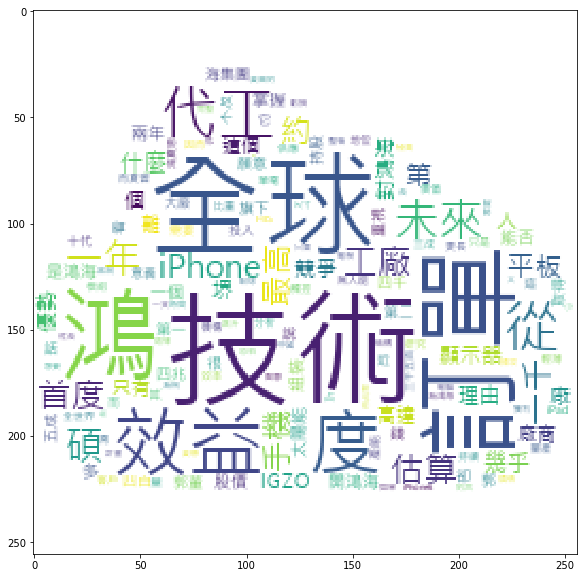

In [20]:
font = r"C:\Windows\Fonts\Microsoft JhengHei UI\msjh.ttc"
alice_mask = np.array(Image.open("week4/cloudy.png"))
wordcloud = WordCloud(font_path=font,background_color="white", mask=alice_mask)
wordcloud.fit_words(wordDict)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.savefig("week5/BOMB.png")